# Time Series Forecasting

## Imports

In [1]:
# Linear Algebram, Data Manipulation
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
import statsmodels.api as sm

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

## Get Our Data

In [2]:
owid_df = pd.read_csv("./datasets/owid-covid-data.csv")
owid_df["date"] = pd.to_datetime(owid_df['date'])

## Getting Desired Data for Training and Predicitons

In [3]:
covid_df = owid_df.location.unique()
indexer = owid_df[owid_df["location"] == "United States"].index

covid_df = owid_df.loc[indexer, "date": "new_deaths_per_million"]
covid_df.dropna(inplace=True)
covid_df.set_index("date", inplace=True)
covid_df.drop(covid_df.columns.difference(["new_deaths_per_million"]), 1, inplace=True)
covid_df

,new_deaths_per_million
date,
2020-03-01,0.003
2020-03-02,0.003
2020-03-03,0.012
2020-03-04,0.009
2020-03-05,0.006
...,...
2020-10-23,2.541
2020-10-24,2.879
2020-10-25,2.731


## Plotting the data with moving average

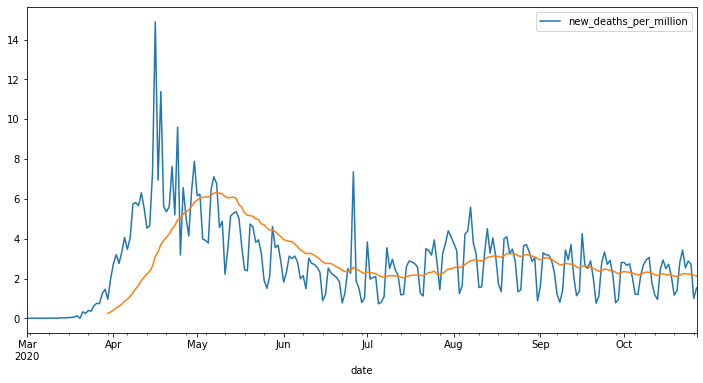

In [4]:
covid_df.plot(figsize=(12, 6))
covid_df.rolling(window=30).mean()["new_deaths_per_million"].plot()
plt.show()

In [5]:
covid_df = covid_df.asfreq("d") # frequency set to days
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-03-01 to 2020-10-27
Freq: D
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_deaths_per_million  241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


## Splitting the data into training and testing data

In [6]:
train_df = covid_df.iloc[:192]
test_df = covid_df.iloc[191:]

train_df.shape, test_df.shape

((192, 1), (50, 1))

## Holt-Winters Model with Training Data

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fit_model = ExponentialSmoothing(train_df["new_deaths_per_million"],
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=14).fit()

prediction = fit_model.forecast(50)

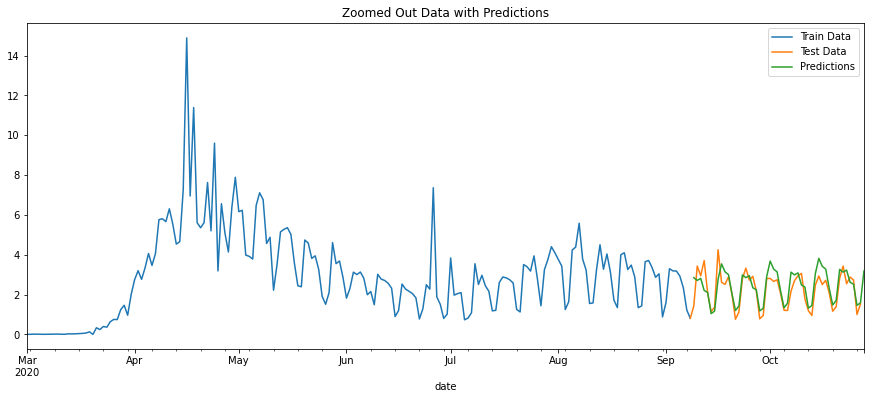

In [8]:
train_df["new_deaths_per_million"].plot(figsize=(15, 6), label="Train Data")
test_df["new_deaths_per_million"].plot(label="Test Data")
prediction.plot(label="Predictions")
plt.title("Zoomed Out Data with Predictions")
plt.legend(loc=0)
plt.show()

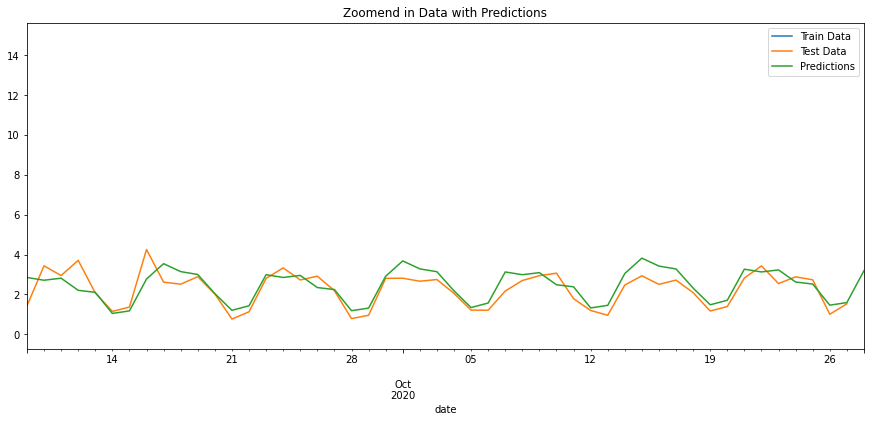

In [9]:
train_df["new_deaths_per_million"].plot(figsize=(15, 6), label="Train Data")
test_df["new_deaths_per_million"].plot(label="Test Data")
prediction.plot(label="Predictions", xlim=["2020-09-09", "2020-10-28"])
plt.title("Zoomend in Data with Predictions")
plt.legend(loc=0)
plt.show()

## Evaluating Predictions : Mean Absolute Error

In [10]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error :", mean_absolute_error(test_df, prediction))


Mean Absolute Error : 0.8144482619952786


## Mean Squred Error

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Mean Squared Error :", mean_squared_error(test_df, prediction))

Mean Squared Error : 0.97237662966087


## Root Mean Squared Error

In [12]:
print("Mean Squared Error :", np.sqrt(mean_squared_error(test_df, prediction)))

Mean Squared Error : 0.9860915929369188


## Predict The Future

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

covid_model = ExponentialSmoothing(covid_df["new_deaths_per_million"],
                                 trend="add",
                                 seasonal="add",
                                 seasonal_periods=14).fit() # Training the Model on Full Data

covid_forecast = fit_model.forecast(100)

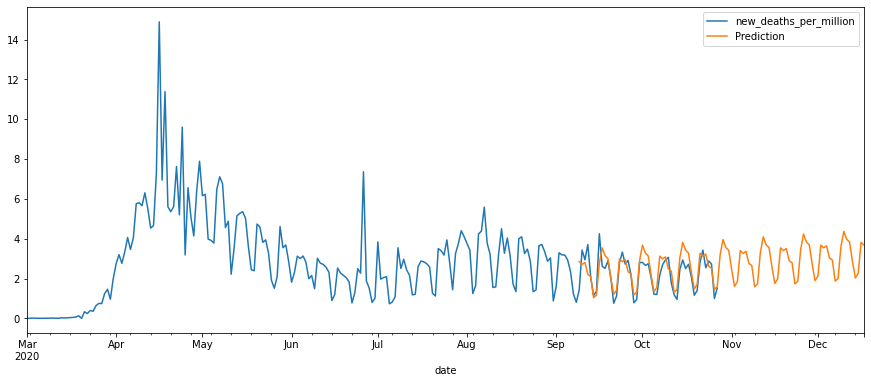

In [14]:
covid_df.plot(figsize=(15, 6), label="Full Data")
covid_forecast.plot(label="Prediction")
plt.legend(loc=0)
plt.show()